# Get text plots for movies

In [46]:
import pandas as pd
import requests
from tqdm import tqdm

from globals import item_metadata_file, imdb_path

In [4]:
# load metadata
metadata = pd.read_hdf(item_metadata_file + '.h5', key='metadata')

In [6]:
metadata.index

Index(['tt0180093', 'tt0118694', 'tt0203009', 'tt0211915', 'tt0287467',
       'tt0167261', 'tt0317248', 'tt0266543', 'tt0325980', 'tt0335266',
       ...
       'tt5095030', 'tt1142988', 'tt0425123', 'tt1059786', 'tt1588173',
       'tt2293640', 'tt1855199', 'tt0780521', 'tt1655442', 'tt0335119'],
      dtype='object', length=1073)

In [ ]:
plots = {}

In [38]:
def get_plot(imdbID, api_key='2438a607'):  # keys: a2ed3a33, 51ed9c6b, 2438a607
    url = f'http://www.omdbapi.com/?i={imdbID}&plot=full&apikey={api_key}'
    resp = requests.get(url=url)
    data = resp.json()
    if data['Response'] != 'False':
        return data['Plot']
    else:
        return ''

In [39]:
for imdbID in tqdm(metadata.index, total=len(metadata.index)):
    if imdbID not in plots or plots[imdbID] == '':
        plots[imdbID] = get_plot(imdbID)    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:17<00:00, 61.55it/s]


In [40]:
plots_df = pd.Series(plots)
plots_df

tt0180093    Sara Goldfarb (Ellen Burstyn) is a retired wid...
tt0118694    Set in Hong Kong, 1962, Chow Mo-Wan is a newsp...
tt0203009    The year is 1899, and Christian, a young Engli...
tt0211915    Amélie is a story about a girl named Amélie wh...
tt0287467    After a chance encounter at a theater, two men...
                                   ...                        
tt2293640    Ever since the dawn of time, the Minions have ...
tt1855199    In South Central Los Angeles, street cops Bria...
tt0780521    A modern day retelling of the classic story Th...
tt1655442    Outside a movie premiere, enthusiastic fan Pep...
tt0335119    This film, adapted from a work of fiction by a...
Length: 1073, dtype: object

<AxesSubplot:>

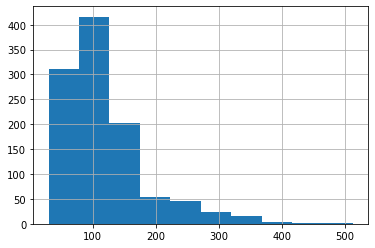

In [45]:
plots_df.apply(lambda x: len(x.split())).hist()

In [43]:
plots_df.to_csv('../data/text_plots.csv', header=None)

### Save potentially useful info

In [50]:
def load_imdb_titles(imdbIDs, usecols=('tconst', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres', 'startYear')):
    df = pd.read_csv(imdb_path + 'title.basics.tsv', index_col='tconst', sep='\t', usecols=usecols, encoding='utf-8', keep_default_na=False, na_values=['\\N']).loc[imdbIDs]
    return df

df = load_imdb_titles(plots_df.index)

C:\Users\mikem\AppData\Local\Temp/ipykernel_4332/2206609681.py:5: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  df = load_imdb_titles(plots_df.index)


In [52]:
df['Plot'] = plots_df
df

,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,Plot
tt0180093,Requiem for a Dream,Requiem for a Dream,2000.0,102.0,Drama,Sara Goldfarb (Ellen Burstyn) is a retired wid...
tt0118694,In the Mood for Love,Fa yeung nin wah,2000.0,98.0,"Drama,Romance","Set in Hong Kong, 1962, Chow Mo-Wan is a newsp..."
tt0203009,Moulin Rouge!,Moulin Rouge!,2001.0,127.0,"Drama,Musical,Romance","The year is 1899, and Christian, a young Engli..."
tt0211915,Amélie,Le fabuleux destin d'Amélie Poulain,2001.0,122.0,"Comedy,Romance",Amélie is a story about a girl named Amélie wh...
tt0287467,Talk to Her,Hable con ella,2002.0,112.0,"Drama,Mystery,Romance","After a chance encounter at a theater, two men..."
...,...,...,...,...,...,...
tt2293640,Minions,Minions,2015.0,91.0,"Adventure,Animation,Comedy","Ever since the dawn of time, the Minions have ..."
tt1855199,End of Watch,End of Watch,2012.0,109.0,"Action,Adventure,Crime","In South Central Los Angeles, street cops Bria..."
tt0780521,The Princess and the Frog,The Princess and the Frog,2009.0,97.0,"Adventure,Animation,Comedy",A modern day retelling of the classic story Th...
tt1655442,The Artist,The Artist,2011.0,100.0,"Comedy,Drama,Romance","Outside a movie premiere, enthusiastic fan Pep..."


In [53]:
df.to_csv('../data/moivie_info.csv')